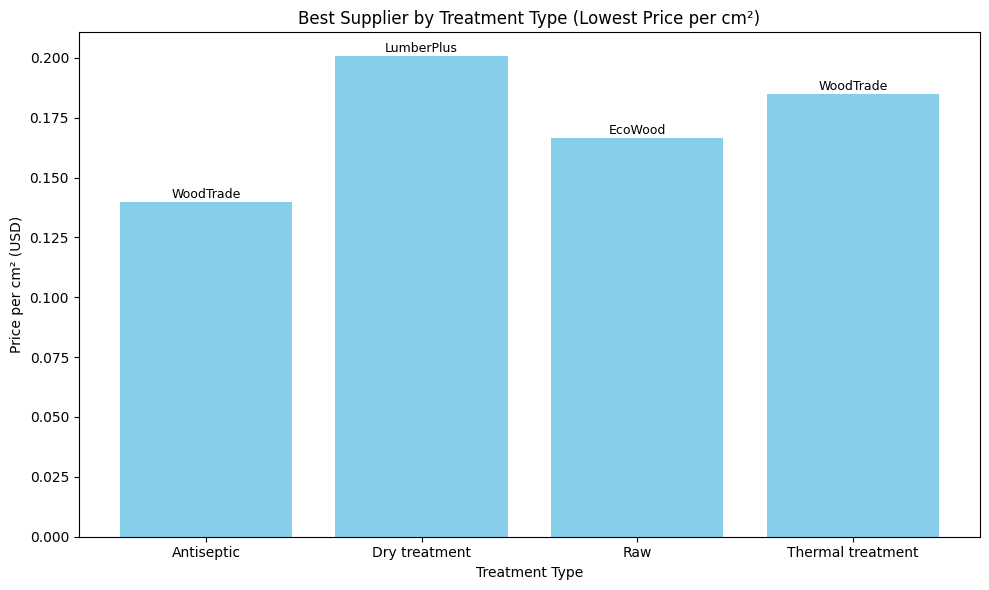

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/Andrei-analyst/wood-supplier-analysis/main/supply_of_boards.csv")

# Calculate area and price per cm²
df["area_cm2"] = df["width_cm"] * df["length_cm"]
df["price_per_cm2"] = df["price_usd"] / df["area_cm2"]

# Group and find best suppliers
grouped = df.groupby(["treatment", "supplier"])["price_per_cm2"].mean().reset_index()
best_suppliers = grouped.loc[grouped.groupby("treatment")["price_per_cm2"].idxmin()]

# Plot results
plt.figure(figsize=(10, 6))
bars = plt.bar(best_suppliers["treatment"], best_suppliers["price_per_cm2"], color="skyblue")

for bar, supplier in zip(bars, best_suppliers["supplier"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0005, supplier,
             ha='center', va='bottom', fontsize=9)

plt.title("Best Supplier by Treatment Type (Lowest Price per cm²)")
plt.ylabel("Price per cm² (USD)")
plt.xlabel("Treatment Type")
plt.tight_layout()
plt.show()

**Tools used:** Python, Pandas, Matplotlib

**Result:** Bar chart showing the best suppliers by treatment type based on cost efficiency.